## Plotting the Earth's Surface

Here we plot a map of the Greater Toronto Area using elevation data taken from the US Geological Survey. After plotting the elevation map we plot a map of the intensity of illumination on the surface assuming that the sun is setting.

In [1]:
# map details
lat = 43
long = -80
N = 1201    # square grid width

In [2]:
from numpy import zeros
import struct

# get data
filename = 'N43W080.hgt'
file = open(filename, 'rb')

# initialize 2D array to hold elevation data
w = zeros((N, N))
for lat in range(N):
    for long in range(N):
        buf = file.read(2)
        w[long, 1200 - lat] = struct.unpack('>h', buf)[0]

In [3]:
def differentiate(w, h, N):    # central differences
    dx, dy = zeros((N, N), float), zeros((N, N), float)
    
    dx[1:-1, :] = (w[2:, :] - w[0:-2, :])/(2.*h)
    dy[:, 1:-1] = (w[:, 2:] - w[:, 0:-2])/(2.*h)
    
    return dx, dy

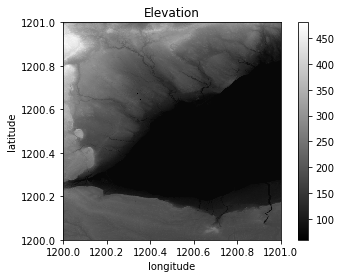

In [4]:
from pylab import figure, imshow, xlabel, ylabel, title, colorbar, show

figure(1)
imshow(w.transpose(), cmap='gray', vmin=60, extent=[long, long+1, lat, lat+1], origin='lower')
xlabel('longitude'), ylabel('latitude')
title('Elevation')
colorbar()
show()

In [5]:
from numpy import cos, sin, sqrt, pi

phi = pi    # light shining from west
h = 420.    # distance between data points
dx, dy = differentiate(w, h, N)
# intensity as a function of angle at which light hits ground
I = -(cos(phi)*dx + sin(phi)*dy)/sqrt(dx**2 + dy**2 + 1)

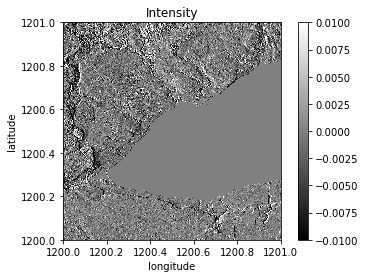

In [6]:
v_range = 0.01

figure(2)
imshow(I.transpose(), cmap='gray', vmin=-v_range, vmax=v_range, extent=[long, long+1, lat, lat+1], origin='lower')
xlabel('longitude'), ylabel('latitude')
title('Intensity')
colorbar()
show()